In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp

In [ ]:
time_limit = 3600
stocks2019=pd.read_csv('stocks2019.csv')
stocks2020=pd.read_csv('stocks2020.csv')

# 0. Load and import the data

In [2]:
stocks2019=pd.read_csv('stocks2019.csv')
stocks2019

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
1,2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2,2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
3,2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
4,2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2019-12-23,8696.009766,58.505219,328.950012,45.459999,110.459999,278.140015,1350.630005,1348.839966,1793.000000,...,34.660000,253.020004,192.429993,148.814499,219.979996,56.759140,165.610001,61.401749,61.415092,97.683632
247,2019-12-24,8699.509766,58.425743,329.640015,46.540001,110.279999,277.890015,1344.430054,1343.560059,1789.209961,...,34.470001,252.490005,192.750000,148.436371,220.559998,56.545940,166.190002,60.941479,61.655396,97.278679
248,2019-12-26,8778.309570,58.505219,331.200012,46.630001,108.930000,278.260010,1362.469971,1360.400024,1868.770020,...,34.570000,251.330002,193.710007,148.098038,220.250000,57.078938,165.360001,61.499676,61.586739,97.466339
249,2019-12-27,8770.980469,58.803261,330.790009,46.180000,108.550003,277.640015,1354.640015,1351.890015,1869.800049,...,34.610001,253.169998,194.050003,147.849274,220.970001,57.195225,165.850006,60.843552,61.910412,97.209534


In [3]:
stocks2020=pd.read_csv('stocks2020.csv')
stocks2020

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2020-01-02,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,...,36.970001,254.550003,196.729996,150.376770,219.449997,57.253372,167.460007,64.771545,61.184597,100.399811
1,2020-01-03,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,...,36.180000,250.169998,200.880005,151.839554,217.979996,57.253372,168.440002,63.774597,61.478848,98.088585
2,2020-01-06,8848.519531,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,...,35.689999,250.949997,202.740005,152.187836,224.029999,57.747601,169.490005,62.550629,61.390568,96.044044
3,2020-01-07,8846.450195,59.945747,333.390015,48.250000,106.849998,283.059998,1395.109985,1393.339966,1906.859985,...,37.330002,253.089996,203.210007,153.461548,223.789993,57.456879,172.949997,66.785164,61.263062,98.236748
4,2020-01-08,8912.370117,59.488754,337.869995,47.830002,108.580002,286.000000,1405.040039,1404.319946,1891.969971,...,36.869999,258.000000,204.149994,154.874542,231.089996,54.103855,178.710007,67.752487,61.204208,97.960182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020-09-24,10896.469727,79.690002,467.670013,75.820000,112.019997,311.880005,1422.859985,1428.290039,3019.790039,...,27.750000,215.589996,202.009995,177.229996,263.130005,35.029999,208.690002,37.529999,67.070000,99.010002
185,2020-09-25,11151.129883,80.980003,479.779999,78.059998,114.430000,317.929993,1439.060059,1444.959961,3095.129883,...,30.150000,216.830002,205.580002,181.339996,268.179993,35.430000,215.779999,38.470001,68.500000,100.349998
186,2020-09-28,11364.450195,81.949997,488.510010,79.480003,113.300003,322.859985,1458.660034,1464.520020,3174.050049,...,32.000000,225.740005,204.720001,184.520004,267.730011,36.070000,220.339996,38.619999,68.849998,103.800003
187,2020-09-29,11322.950195,80.779999,489.329987,81.769997,112.459999,320.170013,1466.020020,1469.329956,3144.879883,...,31.270000,222.880005,204.910004,184.380005,270.309998,35.380001,220.779999,39.320000,68.650002,103.629997


In [4]:
(stocks2019.iloc[:,1:]-stocks2019.iloc[:,1:].shift(1))/stocks2019.iloc[:,1:].shift(1)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
3,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
4,0.009802,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.002019,-0.005572,0.004090,0.029672,0.006469,0.019239,-0.000437,-0.000556,0.003638,-0.000123,...,0.002603,0.010060,-0.000104,-0.000869,-0.003217,0.003083,-0.009273,0.026019,-0.017615,0.011868
247,0.000402,-0.001358,0.002098,0.023757,-0.001630,-0.000899,-0.004590,-0.003914,-0.002114,-0.002880,...,-0.005482,-0.002095,0.001663,-0.002541,0.002637,-0.003756,0.003502,-0.007496,0.003913,-0.004146
248,0.009058,0.001360,0.004732,0.001934,-0.012242,0.001331,0.013418,0.012534,0.044467,-0.001774,...,0.002901,-0.004594,0.004981,-0.002279,-0.001406,0.009426,-0.004994,0.009160,-0.001114,0.001929
249,-0.000835,0.005094,-0.001238,-0.009650,-0.003488,-0.002228,-0.005747,-0.006256,0.000551,-0.001530,...,0.001157,0.007321,0.001755,-0.001680,0.003269,0.002037,0.002963,-0.010669,0.005256,-0.002635


In [ ]:
'''return2019 = stocks2019.iloc[:,1:].pct_change(axis='rows')[1:]
return2020 = stocks2020.iloc[:,1:].pct_change(axis='rows')[1:]'''

In [5]:
return2019 = stocks2019.iloc[:,1:].pct_change(axis='rows')[1:]
return2019

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
3,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
4,0.009802,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
5,0.007454,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.002019,-0.005572,0.004090,0.029672,0.006469,0.019239,-0.000437,-0.000556,0.003638,-0.000123,...,0.002603,0.010060,-0.000104,-0.000869,-0.003217,0.003083,-0.009273,0.026019,-0.017615,0.011868
247,0.000402,-0.001358,0.002098,0.023757,-0.001630,-0.000899,-0.004590,-0.003914,-0.002114,-0.002880,...,-0.005482,-0.002095,0.001663,-0.002541,0.002637,-0.003756,0.003502,-0.007496,0.003913,-0.004146
248,0.009058,0.001360,0.004732,0.001934,-0.012242,0.001331,0.013418,0.012534,0.044467,-0.001774,...,0.002901,-0.004594,0.004981,-0.002279,-0.001406,0.009426,-0.004994,0.009160,-0.001114,0.001929
249,-0.000835,0.005094,-0.001238,-0.009650,-0.003488,-0.002228,-0.005747,-0.006256,0.000551,-0.001530,...,0.001157,0.007321,0.001755,-0.001680,0.003269,0.002037,0.002963,-0.010669,0.005256,-0.002635


In [6]:
index_return2019 = return2019['NDX']

In [7]:
stock_return2019 = return2019.drop('NDX', axis=1)

# Calculate the correlation matrix

In [8]:
stock_cor2019=stock_return2019.corr()

stock_cor2019

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


In [9]:
return2020 = stocks2020.iloc[:,1:].pct_change(axis='rows')[1:]
return2020

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1,-0.008827,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,...,-0.021369,-0.017207,0.021095,0.009727,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
2,0.006211,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
3,-0.000234,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005034,0.020414,0.067698,-0.002077,0.022830
4,0.007452,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,...,-0.012323,0.019400,0.004626,0.009207,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
5,0.008669,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.005828,-0.005491,-0.005782,0.014586,-0.003647,0.011546,0.009557,0.009242,0.006644,-0.009357,...,0.003254,-0.006681,0.009343,0.000847,-0.002615,-0.000856,0.006268,-0.035714,0.013295,0.017679
185,0.023371,0.016188,0.025894,0.029544,0.021514,0.019398,0.011386,0.011671,0.024949,0.014564,...,0.086486,0.005752,0.017672,0.023190,0.019192,0.011419,0.033974,0.025047,0.021321,0.013534
186,0.019130,0.011978,0.018196,0.018191,-0.009875,0.015507,0.013620,0.013537,0.025498,0.013165,...,0.061360,0.041092,-0.004183,0.017536,-0.001678,0.018064,0.021133,0.003899,0.005109,0.034380
187,-0.003652,-0.014277,0.001679,0.028812,-0.007414,-0.008332,0.005046,0.003284,-0.009190,0.005141,...,-0.022813,-0.012669,0.000928,-0.000759,0.009637,-0.019129,0.001997,0.018125,-0.002905,-0.001638


# Method1: stock selection + weights adjustment 

### 1.1 stock selection by maximize sum(PijXij)

In [10]:
n = stock_cor2019.shape[0]
pij = []

for i in range(n):
    for j in range(n):
        pij.append(stock_cor2019.iloc[i,j])

In [11]:
A = np.zeros((1+n+n**2,n+n**2))

#constraint 1 & 2
for i in range(n+1):
    A[i,i*n: (i+1)*n]=[1]*n

    
#constraint 3
for i in range(n):
    A[n+1+i*n:n+1+(i+1)*n, i] = -1
    for j in range(n):
        for k in range(n):
            A[n+1+i*n+j,k*n+j+n]=1
           

In [12]:
A

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
obj = np.array([0]*n+pij)
A = np.zeros((1+n+n**2,n+n**2))

#constraint 1 & 2
for i in range(n+1):
    A[i,i*n: (i+1)*n]=[1]*n

    
#constraint 3
for i in range(n):
    A[n+1+i*n:n+1+(i+1)*n, i] = -1
    for j in range(n):
        A[n+1+i*n+j, i+j*n+n]=1

sense=np.array(['=']*(n+1)+['<']*(n**2))

m=5
b=np.zeros(1+n+n**2)
b[0]=m
b[1:n+1]=1

In [14]:
pd.Series(A[101]).value_counts()

 0.0    10098
 1.0        1
-1.0        1
dtype: int64

In [15]:
ipMod = gp.Model()
ipMod_x = ipMod.addMVar(n**2+n,vtype=['B']*(n**2+n)) # 'C' or 'I' or 'B'
ipMod_con = ipMod.addMConstrs(A, ipMod_x, sense, b)
ipMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

ipMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
ipMod.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


In [16]:
num_stocks = return2019.shape[1]-1
stocknum = list(np.where(ipMod_x.x[0:num_stocks+1]==1)[0])

In [17]:
stocknum

[56, 59, 63, 94, 98]

In [18]:
stock_select = []
for i in stocknum:
    stock_select.append(stock_cor2019.columns[i])
print(stock_select)

['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']


### 1.2 Weight calculation by minimizing difference

In [19]:
return2019

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
3,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
4,0.009802,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
5,0.007454,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.002019,-0.005572,0.004090,0.029672,0.006469,0.019239,-0.000437,-0.000556,0.003638,-0.000123,...,0.002603,0.010060,-0.000104,-0.000869,-0.003217,0.003083,-0.009273,0.026019,-0.017615,0.011868
247,0.000402,-0.001358,0.002098,0.023757,-0.001630,-0.000899,-0.004590,-0.003914,-0.002114,-0.002880,...,-0.005482,-0.002095,0.001663,-0.002541,0.002637,-0.003756,0.003502,-0.007496,0.003913,-0.004146
248,0.009058,0.001360,0.004732,0.001934,-0.012242,0.001331,0.013418,0.012534,0.044467,-0.001774,...,0.002901,-0.004594,0.004981,-0.002279,-0.001406,0.009426,-0.004994,0.009160,-0.001114,0.001929
249,-0.000835,0.005094,-0.001238,-0.009650,-0.003488,-0.002228,-0.005747,-0.006256,0.000551,-0.001530,...,0.001157,0.007321,0.001755,-0.001680,0.003269,0.002037,0.002963,-0.010669,0.005256,-0.002635


In [20]:
stock_select.insert(0,'NDX')

return_stocks_chosen = return2019[stock_select]
return_stocks_chosen

,NDX,LBTYK,MXIM,MSFT,VRTX,XEL
1,-0.033602,-0.006280,-0.056845,-0.036788,-0.002133,-0.003940
2,0.044824,0.068546,0.044004,0.046509,0.054785,0.009786
3,0.010211,-0.042766,0.010388,0.001275,0.018240,-0.004330
4,0.009802,-0.036122,-0.015026,0.007251,0.013307,0.011597
5,0.007454,0.002959,0.027098,0.014300,0.023065,-0.007984
...,...,...,...,...,...,...
246,0.002019,0.004617,-0.004213,0.000000,-0.003217,-0.017615
247,0.000402,0.000919,-0.002604,-0.000191,0.002637,0.003913
248,0.009058,-0.016988,0.006526,0.008197,-0.001406,-0.001114
249,-0.000835,0.020551,-0.002431,0.001828,0.003269,0.005256


In [21]:
row_num = return_stocks_chosen.shape[0]
col_num = return_stocks_chosen.shape[1]
obj = np.array([1]*row_num+[0]*m)

A = np.zeros((row_num*2+1,row_num+m))
b = np.zeros(row_num*2+1)
for i in range(row_num):
    A[2*i:2*i+2, i] = 1
    A[2*i, row_num:] = return_stocks_chosen.iloc[i,1:]
    A[2*i+1, row_num:] = return_stocks_chosen.iloc[i,1:].map(lambda x: -x)
    
    b[2*i] = return_stocks_chosen.iloc[i,0]
    b[2*i+1] = -return_stocks_chosen.iloc[i,0]
A[-1,-m:] = [1]*m   
sense=['>']*(row_num*2)+['=']
b[-1] = 1

In [22]:
lpMod = gp.Model()
lpMod_x = lpMod.addMVar(row_num+m)
lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
lpMod.optimize()

In [23]:
lpMod_x.x[-m:]

array([0.04886175, 0.21038806, 0.58035198, 0.07119022, 0.089208  ])

In [24]:
lpMod.objVal

0.7891782824631479

In [25]:
return2020_chosen = return2020[stock_select]
return2020_chosen

,NDX,LBTYK,MXIM,MSFT,VRTX,XEL
1,-0.008827,-0.016204,-0.017299,-0.012452,-0.006699,0.004809
2,0.006211,0.015059,-0.018093,0.002585,0.027755,-0.001436
3,-0.000234,-0.007881,0.022576,-0.009118,-0.001071,-0.002077
4,0.007452,-0.043458,-0.000325,0.015928,0.032620,-0.000961
5,0.008669,-0.024426,0.007308,0.012493,-0.003592,0.002244
...,...,...,...,...,...,...
184,0.005828,0.003982,0.005573,0.012962,-0.002615,0.013295
185,0.023371,0.015865,0.008775,0.022787,0.019192,0.021321
186,0.019130,0.019522,0.037998,0.007795,-0.001678,0.005109
187,-0.003652,0.000479,-0.002646,-0.010409,0.009637,-0.002905


In [26]:
pd.DataFrame({'Stocks':stock_select[1:],'Weight':lpMod_x.x[-m:]})

,Stocks,Weight
0,LBTYK,0.048862
1,MXIM,0.210388
2,MSFT,0.580352
3,VRTX,0.071190
4,XEL,0.089208


In [27]:
weight = lpMod_x.x[-m:]

sums = 0
for i in range(len(return2020_chosen)):
    sums += abs(return2020_chosen.iloc[i,0]-weight@return2020_chosen.iloc[i,1:])
print(sums)

0.8696699433741902


### 1.3 Redo previous steps with different m

In [28]:
m_choice = [i for i in range(10,110,10)]
    
obj1 = np.array([0]*n+pij)
A1 = np.zeros((1+n+n**2,n+n**2))
#constraint 1 & 2
for i in range(n+1):
    A1[i,i*n: (i+1)*n]=[1]*n
#constraint 3
for i in range(n):
    A1[n+1+i*n:n+1+(i+1)*n, i] = -1
    for j in range(n):
        A1[n+1+i*n+j, i+j*n+n]=1
sense1=np.array(['=']*(n+1)+['<']*(n**2))
b1=np.zeros(1+n+n**2)
b1[1:n+1]=1

evaluation2020 = []
evaluation2019 = []
final_stock_selected=[]
final_weight=[]

for m in m_choice:
    if m < return2019.shape[1]:
        print('When m = {}'.format(m))
        b1[0]=m
        ipMod = gp.Model()
        ipMod_x = ipMod.addMVar(n**2+n,vtype=['B']*(n**2+n)) # 'C' or 'I' or 'B'
        ipMod_con = ipMod.addMConstrs(A1, ipMod_x, sense1, b1)
        ipMod.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE)
        ipMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
        ipMod.optimize()

        num_stocks = return2019.shape[1]-1
        stocknum = list(np.where(ipMod_x.x[0:num_stocks]==1)[0])
        print(stocknum)
        stock_select = []
        for i in stocknum:
            stock_select.append(stock_cor2019.columns[i])
        print('{} stocks selected: {}'.format(m,' '.join(stock_select)))
        final_stock_selected.append(stock_select)
        
        index_stock_select = stock_select.copy()
        index_stock_select.insert(0,'NDX')
        return_stocks_chosen = return2019[index_stock_select]
        
        row_num = return_stocks_chosen.shape[0]
        col_num = return_stocks_chosen.shape[1]
        obj = np.array([1]*row_num+[0]*m)
        A = np.zeros((row_num*2+1,row_num+m))
        b = np.zeros(row_num*2+1)
        for i in range(row_num):
            A[2*i:2*i+2, i] = 1
            A[2*i, row_num:] = return_stocks_chosen.iloc[i,1:]
            A[2*i+1, row_num:] = return_stocks_chosen.iloc[i,1:].map(lambda x: -x)
            b[2*i] = return_stocks_chosen.iloc[i,0]
            b[2*i+1] = -return_stocks_chosen.iloc[i,0]
        A[-1,-m:] = [1]*m   
        sense=['>']*(row_num*2)+['=']
        b[-1] = 1
        lpMod = gp.Model()
        lpMod_x = lpMod.addMVar(row_num+m)
        lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
        lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
        lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
        lpMod.optimize()
        
        weight = lpMod_x.x[-m:]
        final_weight.append(weight)
        print('Weights for stocks: ',weight)
        return2020_chosen = return2020[index_stock_select]
        sum2020 = 0
        sum2019 = 0
        for i in range(len(return_stocks_chosen)):
            sum2019 += abs(return_stocks_chosen.iloc[i,0]-weight@return_stocks_chosen.iloc[i,1:])   
        for i in range(len(return2020_chosen)):
            sum2020 += abs(return2020_chosen.iloc[i,0]-weight@return2020_chosen.iloc[i,1:])
        evaluation2020.append(sum2020)
        evaluation2019.append(sum2019)
        print('How well this portfolio tracks index in 2020: ',sum2020)
        print('How well this portfolio tracks index in 2019: ',sum2019)
        print('\n')
        
    else:
        print('There are not enough stocks to choose from')
        break
    

When m = 10
[0, 4, 19, 53, 56, 59, 63, 79, 94, 98]
10 stocks selected: ATVI ALGN BKNG KHC LBTYK MXIM MSFT ROST VRTX XEL
Weights for stocks:  [0.04113109 0.01220822 0.03947107 0.02150838 0.02807146 0.16324424
 0.48152712 0.08980658 0.05700025 0.06603159]
How well this portfolio tracks index in 2020:  0.8313165184500764
How well this portfolio tracks index in 2019:  0.6865330111458114


When m = 20
[0, 4, 5, 10, 15, 17, 24, 36, 40, 51, 53, 56, 59, 63, 64, 72, 76, 91, 94, 98]
20 stocks selected: ATVI ALGN GOOGL ANSS ADP BIIB CHTR DLTR EXPE JD KHC LBTYK MXIM MSFT MRNA PCAR PDD ULTA VRTX XEL
Weights for stocks:  [0.01756825 0.01508489 0.18359297 0.05818267 0.01685752 0.00741868
 0.06713923 0.01979744 0.00369784 0.04895155 0.02014677 0.00465657
 0.10796196 0.28927337 0.00136735 0.04314254 0.01102836 0.01246406
 0.03620606 0.03546189]
How well this portfolio tracks index in 2020:  0.6220359228268948
How well this portfolio tracks index in 2019:  0.4662681416517705


When m = 30
[0, 1, 5, 12, 

In [29]:
method1 = pd.DataFrame({'m':m_choice,
             'Eval2020': evaluation2020,
             'Eval2019':evaluation2019,
             'Stocks Selected': final_stock_selected,
             'Weights':final_weight})   
method1

,m,Eval2020,Eval2019,Stocks Selected,Weights
0,10,0.831317,0.686533,"[ATVI, ALGN, BKNG, KHC, LBTYK, MXIM, MSFT, ROS...","[0.04113108880016429, 0.012208224438273753, 0...."
1,20,0.622036,0.466268,"[ATVI, ALGN, GOOGL, ANSS, ADP, BIIB, CHTR, DLT...","[0.017568251619133946, 0.015084885097910389, 0..."
2,30,0.551833,0.409792,"[ATVI, ADBE, GOOGL, AMAT, ADP, BIIB, BKNG, CTX...","[0.02098562319972709, 0.048380048191671486, 0...."
3,40,0.571485,0.363281,"[ATVI, ADBE, ALGN, GOOGL, AMGN, AMAT, ADP, BII...","[0.025818176010387342, 0.036218622638988604, 0..."
4,50,0.581148,0.332540,"[ATVI, ADBE, ALXN, ALGN, GOOGL, AMGN, AMAT, AD...","[0.01945631641399028, 0.034341414889970764, 0...."
5,60,0.879273,0.352056,"[ADBE, AMD, ALXN, ALGN, GOOGL, AMGN, AMAT, ADP...","[0.05055168498815694, 0.0168804296242072, 0.00..."
6,70,0.635728,0.233143,"[AMD, ALXN, ALGN, GOOGL, AMGN, AMAT, ADP, BIDU...","[0.005603083016214572, 0.0, 0.0087478992817700..."
7,80,0.386431,0.147683,"[ATVI, AMD, ALXN, ALGN, GOOGL, AMGN, AAPL, AMA...","[0.008611353419439388, 0.006452940814981753, 0..."
8,90,0.249824,0.053827,"[ATVI, ADBE, AMD, ALXN, ALGN, GOOG, AMZN, AMGN...","[0.004072112590971627, 0.020500079760516526, 0..."
9,100,0.249943,0.044911,"[ATVI, ADBE, AMD, ALXN, ALGN, GOOGL, GOOG, AMZ...","[0.004223289593191327, 0.017140049274010583, 0..."


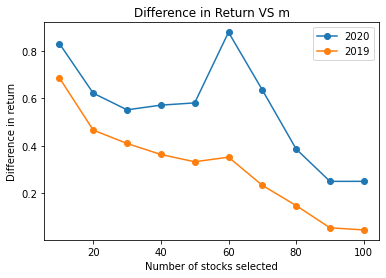

In [30]:
plt.plot(m_choice, evaluation2020, '-o', label=2020)
plt.plot(m_choice, evaluation2019, '-o',label=2019)
plt.xlabel('Number of stocks selected')
plt.ylabel('Difference in return')
plt.title('Difference in Return VS m')
plt.legend(loc='best')

# Method2: MIP method

### 2.1 redo q1,q2

In [31]:
M=1
m=5

return_stocks2019 = return2019.drop('NDX',axis=1)
row_num = return_stocks2019.shape[0]
col_num = return_stocks2019.shape[1]
obj = np.array([1]*row_num+[0]*col_num+[0]*col_num)

A = np.zeros((row_num*2+1+col_num+1,len(obj)))
b = np.zeros(row_num*2+1+col_num+1)

for i in range(row_num):
    A[2*i:2*i+2, i] = 1
    A[2*i, row_num:row_num+col_num] = return2019.iloc[i,1:]
    A[2*i+1, row_num:row_num+col_num] = return2019.iloc[i,1:].map(lambda x: -x)
     
    b[2*i] = return2019.iloc[i,0]
    b[2*i+1] = -return2019.iloc[i,0]
    
for i in range(col_num):
    A[2*row_num+1+i,row_num+i]=1
    A[2*row_num+1+i,row_num+col_num+i]= -M
    
    
A[-2,row_num+col_num:] = [1]*col_num
A[-1,row_num:row_num+col_num] = [1]*col_num  
sense=['>']*(row_num*2)+['<']*col_num + ['=']*2

b[-2] = m
b[-1] = 1

In [32]:
time_limit = 3600

biMod = gp.Model()
biMod_x = biMod.addMVar(len(obj),vtype=['C']*row_num + ['C']*col_num + ['B']*col_num) 
biMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
biMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
biMod.Params.TimeLimit = time_limit
biMod.optimize()

In [33]:
stocknum = list(np.where(biMod_x.x[-col_num:]==1)[0])
stock_select = []
weight = []
for i in stocknum:
    stock_select.append(return_stocks2019.columns[i])
    weight.append(biMod_x.x[row_num+i])
print(stock_select)
print(weight)

['AMZN', 'ADI', 'AAPL', 'MSFT', 'MDLZ']
[0.25012259799983994, 0.11375807105291509, 0.19169220616295393, 0.2898692800135186, 0.1545578447707724]


In [34]:
pd.DataFrame({'Stocks':stock_select,'Weight':weight})

,Stocks,Weight
0,AMZN,0.250123
1,ADI,0.113758
2,AAPL,0.191692
3,MSFT,0.289869
4,MDLZ,0.154558


In [35]:
stock_select.insert(0,'NDX')
return2020_chosen = return2020[stock_select]
sums = 0
for i in range(len(return2020_chosen)):
    sums += abs(return2020_chosen.iloc[i,0]-weight@return2020_chosen.iloc[i,1:])
print(sums)

0.5913979244173762


### 2.2 redo p3

In [36]:
time_limit= 3600
M=1
m_choice = [i for i in range(10,110,10)]

return_stocks2019 = return2019.drop('NDX',axis=1)
row_num = return_stocks2019.shape[0]
col_num = return_stocks2019.shape[1]
obj = np.array([1]*row_num+[0]*col_num+[0]*col_num)

A = np.zeros((row_num*2+1+col_num+1,len(obj)))
b = np.zeros(row_num*2+1+col_num+1)

for i in range(row_num):
    A[2*i:2*i+2, i] = 1
    A[2*i, row_num:row_num+col_num] = return2019.iloc[i,1:]
    A[2*i+1, row_num:row_num+col_num] = return2019.iloc[i,1:].map(lambda x: -x)
     
    b[2*i] = return2019.iloc[i,0]
    b[2*i+1] = -return2019.iloc[i,0]
    
for i in range(col_num):
    A[2*row_num+1+i,row_num+i]=1
    A[2*row_num+1+i,row_num+col_num+i]= -M
    
    
A[-2,row_num+col_num:] = [1]*col_num
A[-1,row_num:row_num+col_num] = [1]*col_num  
sense=['>']*(row_num*2)+['<']*col_num + ['=']*2

b[-1] = 1

final_stock_select=[]
final_weight=[]
evaluation2020=[]
evaluation2019=[]

for m in m_choice:
    print('m={} is running...'.format(m))
    if m < return2019.shape[1]:
        b[-2]=m
        biMod = gp.Model()
        biMod_x = biMod.addMVar(len(obj),vtype=['C']*row_num + ['C']*col_num + ['B']*col_num) 
        biMod_con = biMod.addMConstrs(A, biMod_x, sense, b)
        biMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)
        biMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
        biMod.Params.TimeLimit = time_limit
        biMod.optimize()

        stocknum = list(np.where(biMod_x.x[-col_num:]==1)[0])
        stock_select = []
        weight = []
        for i in stocknum:
            stock_select.append(return_stocks2019.columns[i])
            weight.append(biMod_x.x[row_num+i])
          
        final_stock_select.append(stock_select)
        final_weight.append(weight)

        index_stock_select = stock_select.copy()
        index_stock_select.insert(0,'NDX')    
        return_stocks_chosen = return2019[index_stock_select]
        return2020_chosen = return2020[index_stock_select]

        sum2020 = 0
        sum2019 = 0
        for i in range(len(return_stocks_chosen)):
            sum2019 += abs(return_stocks_chosen.iloc[i,0]-weight@return_stocks_chosen.iloc[i,1:])   
        for i in range(len(return2020_chosen)):
            sum2020 += abs(return2020_chosen.iloc[i,0]-weight@return2020_chosen.iloc[i,1:])
        evaluation2020.append(sum2020)
        evaluation2019.append(sum2019)
    else:
        print('There are not enough stocks to choose from')
        break 

m=10 is running...
m=20 is running...
m=30 is running...
m=40 is running...
m=50 is running...
m=60 is running...
m=70 is running...
m=80 is running...
m=90 is running...
m=100 is running...


In [37]:
method2 = pd.DataFrame({'m':m_choice,
             'Eval2020': evaluation2020,
             'Eval2019':evaluation2019,
             'Stocks Selected': final_stock_select,
             'Weights':final_weight})   
method2

,m,Eval2020,Eval2019,Stocks Selected,Weights
0,10,0.518220,0.301862,"[GOOGL, AMZN, AAPL, CTXS, FB, INTC, MSFT, PAYX...","[0.10107942442491627, 0.13062393741218992, 0.1..."
1,20,0.426428,0.161396,"[ADBE, GOOGL, AMZN, AAPL, ADP, AVGO, CHTR, CSC...","[0.04042427087393464, 0.09514965239617583, 0.1..."
2,30,0.349524,0.105653,"[ADBE, GOOG, AMZN, AAPL, ADP, BIDU, BIIB, BKNG...","[0.039760592473516196, 0.08891743825697862, 0...."
3,40,0.278946,0.079009,"[ATVI, ADBE, GOOG, AMZN, AAPL, AMAT, ADP, BIIB...","[0.00891657095641684, 0.022795975394743925, 0...."
4,50,0.278010,0.062122,"[ADBE, AMD, GOOGL, AMZN, AMGN, AAPL, AMAT, ASM...","[0.019656316289386723, 0.004961320510665668, 0..."
5,60,0.258568,0.053343,"[ATVI, ADBE, AMD, GOOGL, AMZN, AMGN, ADI, AAPL...","[0.0045666031420914365, 0.01203636229360031, 0..."
6,70,0.258282,0.048553,"[ATVI, ADBE, AMD, ALXN, GOOGL, GOOG, AMZN, AMG...","[0.004608330568457466, 0.01799747030512976, 0...."
7,80,0.249828,0.046996,"[ATVI, ADBE, AMD, ALXN, GOOGL, GOOG, AMZN, AMG...","[0.0033820283474522215, 0.0191926193122885, 0...."
8,90,0.247986,0.046745,"[ATVI, ADBE, AMD, ALXN, GOOGL, GOOG, AMZN, AMG...","[0.0033763672062535094, 0.01963758687585936, 0..."
9,100,0.248013,0.046745,"[ATVI, ADBE, AMD, ALXN, ALGN, GOOGL, GOOG, AMZ...","[0.003371588894548345, 0.01963804215318369, 0...."


In [40]:
result = pd.concat([method1[['Eval2020','Eval2019']], method2[['Eval2020','Eval2019']]], axis=1, keys=['Method 1',\
                                                                            'Method 2'])
result.insert(0,'m',[i for i in range (10,110,10)])
result.to_csv('stock portfolio.csv')

In [43]:
result

m  Method 1            Method 2          
        Eval2020  Eval2019  Eval2020  Eval2019
0   10  0.831317  0.686533  0.518220  0.301862
1   20  0.622036  0.466268  0.426428  0.161396
2   30  0.551833  0.409792  0.349524  0.105653
3   40  0.571485  0.363281  0.278946  0.079009
4   50  0.581148  0.332540  0.278010  0.062122
5   60  0.879273  0.352056  0.258568  0.053343
6   70  0.635728  0.233143  0.258282  0.048553
7   80  0.386431  0.147683  0.249828  0.046996
8   90  0.249824  0.053827  0.247986  0.046745
9  100  0.249943  0.044911  0.248013  0.046745

In [54]:
result.columns=['m','Method1_Eval2020','Method1_Eval2019','Method2_Eval2020','Method2_Eval2019']

In [55]:
result

,m,Method1_Eval2020,Method1_Eval2019,Method2_Eval2020,Method2_Eval2019
0,10,0.831317,0.686533,0.518220,0.301862
1,20,0.622036,0.466268,0.426428,0.161396
2,30,0.551833,0.409792,0.349524,0.105653
3,40,0.571485,0.363281,0.278946,0.079009
4,50,0.581148,0.332540,0.278010,0.062122
5,60,0.879273,0.352056,0.258568,0.053343
6,70,0.635728,0.233143,0.258282,0.048553
7,80,0.386431,0.147683,0.249828,0.046996
8,90,0.249824,0.053827,0.247986,0.046745
9,100,0.249943,0.044911,0.248013,0.046745


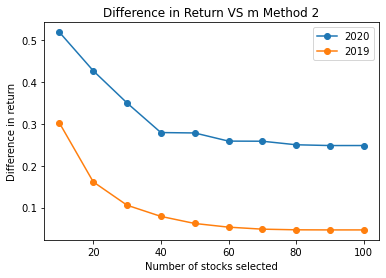

In [56]:
plt.plot(result['m'], result['Method2_Eval2020'], '-o', label=2020)
plt.plot(result['m'], result['Method2_Eval2019'], '-o', label=2019)
plt.xlabel('Number of stocks selected')
plt.ylabel('Difference in return')
plt.title('Difference in Return VS m Method 2')
plt.legend(loc='best')

# 3. Compare method1 and method 2

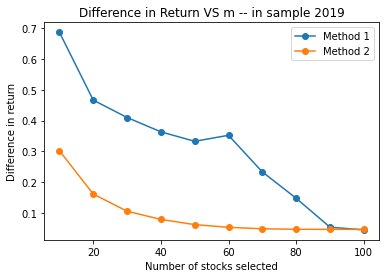

In [57]:
plt.plot(result['m'], result['Method1_Eval2019'], '-o', label='Method 1')
plt.plot(result['m'], result['Method2_Eval2019'], '-o', label='Method 2')
plt.xlabel('Number of stocks selected')
plt.ylabel('Difference in return')
plt.title('Difference in Return VS m -- in sample 2019')
plt.legend(loc='best')

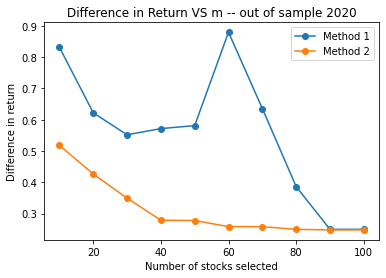

In [58]:
plt.plot(result['m'], result['Method1_Eval2020'], '-o', label='Method 1')
plt.plot(result['m'], result['Method2_Eval2020'], '-o', label='Method 2')
plt.xlabel('Number of stocks selected')
plt.ylabel('Difference in return')
plt.title('Difference in Return VS m -- out of sample 2020')
plt.legend(loc='best')